In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = pd.read_csv('D:\\Private\\CODE\\Classsroom\\Machine_Learning\\STD\\Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [40]:
# print the columns of the data
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [41]:
# print the null count for each column
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [42]:
# describe the data
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<Axes: ylabel='Count'>

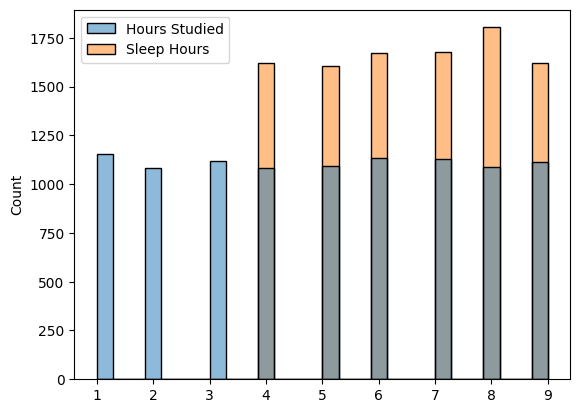

In [43]:
sns.histplot(data[['Hours Studied','Sleep Hours']])

In [44]:
data['Passed'] = data['Performance Index'].apply(lambda x: 'yes' if x > 80 else 'no')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Passed
0,7,99,Yes,9,1,91.0,yes
1,4,82,No,4,2,65.0,no
2,8,51,Yes,7,2,45.0,no
3,5,52,Yes,5,2,36.0,no
4,7,75,No,8,5,66.0,no
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,no
9996,7,64,Yes,8,5,58.0,no
9997,6,83,Yes,8,5,74.0,no
9998,9,97,Yes,7,0,95.0,yes


In [45]:
X = data[['Hours Studied','Sleep Hours']].values
y = data['Passed'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)


In [46]:

encoder = LabelEncoder()
encoder.fit(y_train)
y_test = encoder.transform(y_test)
y_train = encoder.transform(y_train)


In [47]:
model = LogisticRegression()

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-validation scores: [0.89125  0.89125  0.89125  0.890625 0.890625]
Test Accuracy: 0.901
